<a href="https://colab.research.google.com/github/JEN6YT/APS360-Project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_train_data.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_train_data.npy', allow_pickle=True)
X_val = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_val_data.npy', allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_val_data.npy', allow_pickle=True)


In [ ]:
X_test = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_test_data.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_test_data.npy', allow_pickle=True)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = np.float32(X_train)
X_val = np.float32(X_val)

In [ ]:
X_test = np.float32(X_val)

In [ ]:
X_train = np.transpose(X_train, (0,3,2,1))
X_val = np.transpose(X_val, (0,3,2,1))

In [ ]:
X_test = np.transpose(X_test, (0,3,2,1))

In [ ]:
X_train.shape

(1372, 3, 224, 224)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

In [ ]:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, num_workers=1, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, num_workers=4 , shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, num_workers=1 , shuffle=True)

use_cuda = True

print("Training dataset size: ", len(train_dataset))
print("Validation dataset size: ", len(val_dataset))

Training dataset size:  1372
Validation dataset size:  342


In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, num_workers=1 , shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
'''
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.name = "cnn"
    self.conv1 = nn.Conv2d(3, 5, 5) # in_channels=3, out_chanels=5, kernel_size=5
    self.pool = nn.MaxPool2d(2, 2)  #kernel_size=2, stride=2
    self.conv2 = nn.Conv2d(5, 10, 5)   # in_channels=5, out_chanels=10, kernel_size=5
    self.fc1 = nn.Linear(10 * 53 * 53, 244)
    self.fc2 = nn.Linear(244, 9)

  def forward(self, img):
    x = self.pool(F.relu(self.conv1(img)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 10 * 53 * 53)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1) # Flatten to [batch_size]
    return x
model = CNN()
'''

'\nclass CNN(nn.Module):\n  def __init__(self):\n    super(CNN, self).__init__()\n    self.name = "cnn"\n    self.conv1 = nn.Conv2d(3, 5, 5) # in_channels=3, out_chanels=5, kernel_size=5\n    self.pool = nn.MaxPool2d(2, 2)  #kernel_size=2, stride=2\n    self.conv2 = nn.Conv2d(5, 10, 5)   # in_channels=5, out_chanels=10, kernel_size=5\n    self.fc1 = nn.Linear(10 * 53 * 53, 244)\n    self.fc2 = nn.Linear(244, 9)\n\n  def forward(self, img):\n    x = self.pool(F.relu(self.conv1(img)))\n    x = self.pool(F.relu(self.conv2(x)))\n    x = x.view(-1, 10 * 53 * 53)\n    x = F.relu(self.fc1(x))\n    x = self.fc2(x)\n    x = x.squeeze(1) # Flatten to [batch_size]\n    return x\nmodel = CNN()\n'

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.name = "cnn"
    self.conv1 = nn.Conv2d(3, 16, 3) # in_channels=3, out_chanels=5, kernel_size=5
    self.pool = nn.MaxPool2d(2, 2)  #kernel_size=2, stride=2
    self.conv2 = nn.Conv2d(16, 32, 3)   # in_channels=5, out_chanels=10, kernel_size=5
    self.conv3 = nn.Conv2d(32, 64, 3)
    self.conv4 = nn.Conv2d(64, 128, 3)

    self.fc1 = nn.Linear(18432, 224)
    self.fc2 = nn.Linear(224, 9)

  def forward(self, img):
    
    x = self.pool(F.relu(self.conv1(img)))
    #print("after layer 1:",x.shape)
    x = self.pool(F.relu(self.conv2(x)))
    #print("after layer 2:",x.shape)
    x = self.pool(F.relu(self.conv3(x)))
    #print("after layer 3:",x.shape)
    x = self.pool(F.relu(self.conv4(x)))
    #print("after layer 4:",x.shape)
    x = x.view(-1, 18432)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = x.squeeze(1) # Flatten to [batch_size]
    return x
model = CNN()


In [ ]:
'''
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)

        self.encoder = nn.Sequential(
            self.conv1,
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            self.conv2,
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            self.conv3,
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            self.conv4,
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2),
            nn.Sigmoid()
        )

        self.fc1 = nn.Linear(18432, 244)
        self.fc2 = nn.Linear(244, 9)

    def forward(self, img):
        x = self.encoder(img)
        x = x.view(-1, 128 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        x = x.view(-1, 3, 256, 256)
        x = self.decoder(x)
        return x

model = CNN()
'''

In [ ]:
def train(model, train_loader,val_loader, batch_size=128, num_epochs=20, learning_rate=0.01):
    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, train_loss, val_loss, train_acc, val_acc = [], [], [], [], []

    # Training
    start_time = time.time()
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
             
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Save the current training information
            #iters.append(n)
            #train_loss.append(float(loss)/batch_size)             # compute *average* loss
            #n += 1
        
        for imgs, labels in iter(val_loader):
          
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            
            out = model(imgs)             # forward pass
            valid_loss = criterion(out, labels) # compute the total loss
            valid_loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Save the current training information
        
        train_loss.append(float(loss)/batch_size)
        val_loss.append(float(valid_loss)/batch_size)             # compute *average* loss
        
        train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
        val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
        
        print(("Epoch {}: Train acc: {} |"+"Validation acc: {}").format(
                epoch + 1,
                train_acc[-1],
                val_acc[-1]))
        print(("Epoch {}: Train loss: {} |"+"Validation loss: {}").format(
                epoch + 1,
                train_loss[-1],
                val_loss[-1]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Plotting
    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_loss, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_loss, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_acc, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))




In [ ]:
def get_accuracy(model, train=False):
    if train:
        data = train_loader
    else:
        data = val_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



Epoch 1: Train acc: 0.6209912536443148 |Validation acc: 0.6549707602339181
Epoch 1: Train loss: 0.002662727842107415 |Validation loss: 0.0023195622488856316
Epoch 2: Train acc: 0.6435860058309038 |Validation acc: 0.695906432748538
Epoch 2: Train loss: 0.0023713335394859314 |Validation loss: 0.0021360742393881083
Epoch 3: Train acc: 0.6552478134110787 |Validation acc: 0.6754385964912281
Epoch 3: Train loss: 0.0020802882499992847 |Validation loss: 0.0021417508833110332
Epoch 4: Train acc: 0.7142857142857143 |Validation acc: 0.7426900584795322
Epoch 4: Train loss: 0.0024249576963484287 |Validation loss: 0.002442707307636738
Epoch 5: Train acc: 0.6603498542274052 |Validation acc: 0.695906432748538
Epoch 5: Train loss: 0.0020978422835469246 |Validation loss: 0.0018196963937953115
Epoch 6: Train acc: 0.6997084548104956 |Validation acc: 0.7280701754385965
Epoch 6: Train loss: 0.0021861197892576456 |Validation loss: 0.002778982277959585
Epoch 7: Train acc: 0.7164723032069971 |Validation acc: 0

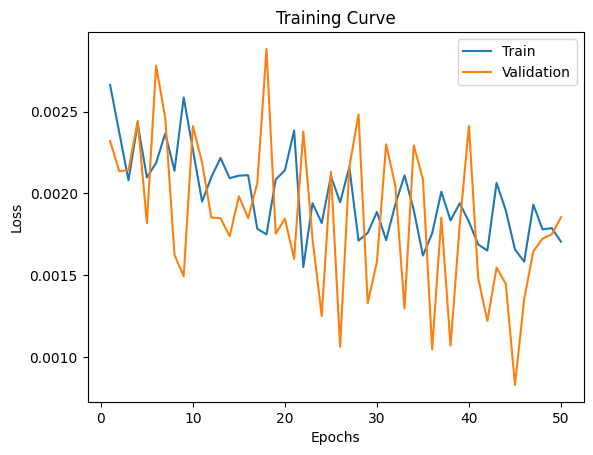

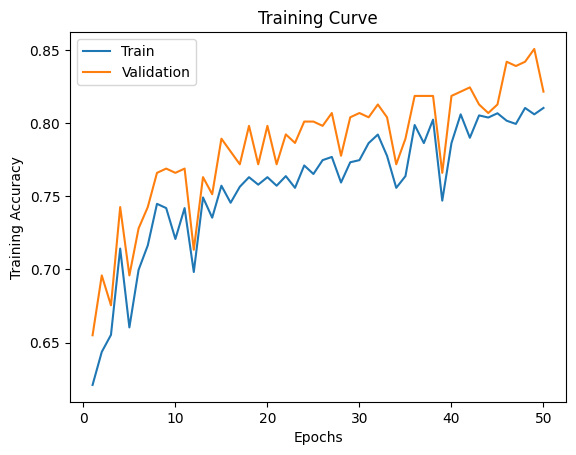

Final Training Accuracy: 0.8104956268221575
Final Validation Accuracy: 0.8216374269005848


In [ ]:
train(model, train_loader, val_loader, batch_size=256, learning_rate=1e-4, num_epochs=50)

Testing the data

In [ ]:
X_test = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_test_data.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_test_data.npy', allow_pickle=True)

In [ ]:
X_test = np.transpose(X_test, (0,3,2,1))
X_test = np.float32(X_val)

In [ ]:
test_dataset = MyDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, num_workers=1 , shuffle=True)

In [ ]:
model_path = get_model_name(model.name, batch_size=256, learning_rate=1e-4, epoch=49)
state = torch.load(model_path)
CNN.load_state_dict(state)

<All keys matched successfully>

In [ ]:
test_accuracy = get_accuracy(CNN,test_loader)
test_accuracy

0.8104956268221575

In [ ]:
test_false_positive = 1 - test_accuracy
test_false_positive

0.18950437317784252